# MSBA 327 _ Midtern Practice

In [3]:
#Python Midterm
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sms
import statsmodels.api as sm
import statistics
#

In [4]:
# 1. Exploratory data analysis (EDA)
#Import data and delet rows defore dt=1850-01-01
Covid1 = pd.read_table('~/Downloads/US-COVID-19.csv', sep=",")
Covid1.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,"297,229","241,035","56,194",0,0,"4,851",NaN,NaN,0,0,03/12/2021 03:20:13 PM,Agree,NaN
1,02/12/2021,UT,"359,641","359,641",0,"1,060",0,"1,785","1,729",56,11,2,02/13/2021 02:50:08 PM,Agree,Agree
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,08/22/2020,AR,"56,199",NaN,NaN,547,0,674,NaN,NaN,11,0,08/23/2020 02:15:28 PM,Not agree,Not agree
4,12/06/2021,MP,"1,104","1,104",0,0,0,5,5,0,2,0,12/08/2021 12:00:00 AM,Agree,Agree


In [5]:
str(Covid1)

'      submission_date state  tot_cases conf_cases prob_cases new_case  \\\n0          03/11/2021    KS    297,229    241,035     56,194        0   \n1          02/12/2021    UT    359,641    359,641          0    1,060   \n2          02/04/2020    AR          0        NaN        NaN        0   \n3          08/22/2020    AR     56,199        NaN        NaN      547   \n4          12/06/2021    MP      1,104      1,104          0        0   \n...               ...   ...        ...        ...        ...      ...   \n46915      06/07/2020    SD      5,438        NaN        NaN       71   \n46916      12/28/2021    NY  1,833,465        NaN        NaN   13,006   \n46917      09/25/2021   RMI          4          4          0        0   \n46918      03/10/2021    SD    113,962        NaN        NaN      209   \n46919      05/27/2021    OH  1,100,312    921,199    179,113      732   \n\n      pnew_case tot_death conf_death prob_death new_death pnew_death  \\\n0             0     4,851        N

In [6]:
#Drop column created_at since we do not need it
Covid2 = Covid1.drop("created_at",1)
Covid2.head()

/var/folders/86/lntksb550lqghk9n494rb9rw0000gn/T/ipykernel_955/3483414967.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Covid2 = Covid1.drop("created_at",1)


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
0,03/11/2021,KS,"297,229","241,035","56,194",0,0,"4,851",NaN,NaN,0,0,Agree,NaN
1,02/12/2021,UT,"359,641","359,641",0,"1,060",0,"1,785","1,729",56,11,2,Agree,Agree
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,Not agree,Not agree
3,08/22/2020,AR,"56,199",NaN,NaN,547,0,674,NaN,NaN,11,0,Not agree,Not agree
4,12/06/2021,MP,"1,104","1,104",0,0,0,5,5,0,2,0,Agree,Agree


In [8]:
#Delet rows that has empty columns
Covid2.dropna(subset=["tot_cases","conf_cases","prob_cases","new_case","pnew_case",
                      "tot_death","conf_death","prob_death","new_death","pnew_death",
                      "consent_cases","consent_deaths"], inplace=True)

Covid2.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
1,02/12/2021,UT,"359,641","359,641",0,"1,060",0,"1,785","1,729",56,11,2,Agree,Agree
4,12/06/2021,MP,"1,104","1,104",0,0,0,5,5,0,2,0,Agree,Agree
5,07/17/2020,MP,37,37,0,1,0,2,2,0,0,0,Agree,Agree
9,12/27/2021,CO,"896,403","820,472","75,931","10,153",543,"10,077","8,922","1,155",3,0,Agree,Agree
10,08/01/2021,GA,"1,187,107","937,515","249,592","3,829","1,144","21,690","18,725","2,965",7,0,Agree,Agree


In [9]:
#Check the duplicated data
duplicate = Covid2.duplicated()
print(duplicate.sum())
Covid2[duplicate]

0


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths


In [10]:
#Check the variables date types
Covid2.dtypes

submission_date    object
state              object
tot_cases          object
conf_cases         object
prob_cases         object
new_case           object
pnew_case          object
tot_death          object
conf_death         object
prob_death         object
new_death          object
pnew_death         object
consent_cases      object
consent_deaths     object
dtype: object

In [11]:
#Convert dt from object to time 
Covid2['submission_date'] = pd.to_datetime(Covid2["submission_date"])
print(Covid2.dtypes)

submission_date    datetime64[ns]
state                      object
tot_cases                  object
conf_cases                 object
prob_cases                 object
new_case                   object
pnew_case                  object
tot_death                  object
conf_death                 object
prob_death                 object
new_death                  object
pnew_death                 object
consent_cases              object
consent_deaths             object
dtype: object


In [12]:
#Sort the submission_date
Covid2.sort_values(by='submission_date', inplace=True)
Covid2.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
12450,2020-01-22,AL,0,0,0,0,0,0,0,0,0,0,Agree,Agree
9834,2020-01-22,ME,0,0,0,0,0,0,0,0,0,0,Agree,Agree
42493,2020-01-22,MP,0,0,0,0,0,0,0,0,0,0,Agree,Agree
38642,2020-01-23,MP,0,0,0,0,0,0,0,0,0,0,Agree,Agree
15794,2020-01-23,AL,0,0,0,0,0,0,0,0,0,0,Agree,Agree


In [13]:
#Delet rows that has all 0
Covid2[~(Covid2.loc[:,["tot_cases","conf_cases","prob_cases","new_case","pnew_case",
                      "tot_death","conf_death","prob_death","new_death","pnew_death"]] == '0').all(axis=1)]


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
31881,2020-02-03,CA,6,6,0,3,0,0,0,0,0,0,Agree,Agree
10342,2020-02-04,CA,6,6,0,0,0,0,0,0,0,0,Agree,Agree
14303,2020-02-05,CA,6,6,0,0,0,0,0,0,0,0,Agree,Agree
29269,2020-02-06,CA,6,6,0,0,0,0,0,0,0,0,Agree,Agree
13741,2020-02-07,CA,6,6,0,0,0,0,0,0,0,0,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27480,2022-03-13,MI,"2,371,788","2,065,912","305,876",0,0,"35,188","32,419","2,769",0,0,Agree,Agree
43275,2022-03-13,PR,"476,063","267,827","208,236",295,145,"4,150","3,455",695,0,0,Agree,Agree
2178,2022-03-13,NYC,"2,287,411","1,946,037","341,374","1,900",258,"39,942","34,441","5,501",15,1,Agree,Agree
39081,2022-03-13,OK,"1,027,663","752,427","275,236",0,0,"13,513","9,604","3,909",0,0,Agree,Agree


In [14]:
Covid2.submission_date = pd.to_datetime(Covid2.submission_date)
Covid2.set_index('submission_date', inplace=True)

Covid2.head()

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
submission_date,,,,,,,,,,,,,
2020-01-22,AL,0,0,0,0,0,0,0,0,0,0,Agree,Agree
2020-01-22,ME,0,0,0,0,0,0,0,0,0,0,Agree,Agree
2020-01-22,MP,0,0,0,0,0,0,0,0,0,0,Agree,Agree
2020-01-23,MP,0,0,0,0,0,0,0,0,0,0,Agree,Agree
2020-01-23,AL,0,0,0,0,0,0,0,0,0,0,Agree,Agree


In [15]:
#Delet comma inside the number
Covid2 = Covid2.replace(',','', regex=True)
print(Covid2)

                state tot_cases conf_cases prob_cases new_case pnew_case  \
submission_date                                                            
2020-01-22         AL         0          0          0        0         0   
2020-01-22         ME         0          0          0        0         0   
2020-01-22         MP         0          0          0        0         0   
2020-01-23         MP         0          0          0        0         0   
2020-01-23         AL         0          0          0        0         0   
...               ...       ...        ...        ...      ...       ...   
2022-03-13         MI   2371788    2065912     305876        0         0   
2022-03-13         PR    476063     267827     208236      295       145   
2022-03-13        NYC   2287411    1946037     341374     1900       258   
2022-03-13         OK   1027663     752427     275236        0         0   
2022-03-13         IL   3045718    3045718          0        0         0   

           

In [16]:
# convert columns of a DataFrame
Covid2["tot_cases"]=pd.to_numeric(Covid2["tot_cases"])
Covid2["conf_cases"]=pd.to_numeric(Covid2["conf_cases"])
Covid2["prob_cases"]=pd.to_numeric(Covid2["prob_cases"])
Covid2["new_case"]=pd.to_numeric(Covid2["new_case"])
Covid2["pnew_case"]=pd.to_numeric(Covid2["pnew_case"])
Covid2["tot_death"]=pd.to_numeric(Covid2["tot_death"])
Covid2["conf_death"]=pd.to_numeric(Covid2["conf_death"])
Covid2["prob_death"]=pd.to_numeric(Covid2["prob_death"])
Covid2["new_death"]=pd.to_numeric(Covid2["new_death"])
Covid2["pnew_death"]=pd.to_numeric(Covid2["pnew_death"])

In [17]:
# 2. Descriptive Statistical Analysis
#Mean 
Covid2.mean()

/var/folders/86/lntksb550lqghk9n494rb9rw0000gn/T/ipykernel_955/249432126.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Covid2.mean()


tot_cases     501888.365226
conf_cases    438831.803952
prob_cases     63056.636670
new_case        1924.967017
pnew_case        296.314994
tot_death       8671.483177
conf_death      7767.345512
prob_death       904.137665
new_death         23.472325
pnew_death         2.709269
dtype: float64

In [18]:
#Median
print(statistics.median(Covid2.tot_cases))
print(statistics.median(Covid2.conf_cases))
print(statistics.median(Covid2.prob_cases))
print(statistics.median(Covid2.new_case))
print(statistics.median(Covid2.pnew_case))
print(statistics.median(Covid2.tot_death))
print(statistics.median(Covid2.conf_death))
print(statistics.median(Covid2.prob_death))
print(statistics.median(Covid2.new_death))
print(statistics.median(Covid2.pnew_death))

234312.5
205546.0
12179.0
636.5
42.0
4099.0
3590.0
232.0
7.0
0.0


In [19]:
#Range of data
print(max(Covid2.tot_cases) - min(Covid2.tot_cases))
print(max(Covid2.conf_cases) - min(Covid2.conf_cases))
print(max(Covid2.prob_cases) - min(Covid2.prob_cases))
print(max(Covid2.new_case) - min(Covid2.new_case))
print(max(Covid2.pnew_case) - min(Covid2.pnew_case))
print(max(Covid2.tot_death) - min(Covid2.tot_death))
print(max(Covid2.conf_death) - min(Covid2.conf_death))
print(max(Covid2.prob_death) - min(Covid2.prob_death))
print(max(Covid2.new_death) - min(Covid2.new_death))
print(max(Covid2.pnew_death) - min(Covid2.pnew_death))

4885289
4640489
599278
130375
23188
71408
71408
6452
1530
3615


In [20]:
#Sum cases of each state
sum_case = Covid2.groupby(['state'])['tot_cases'].sum().reset_index()

In [21]:
#Top 20 states that has most cases 
cases = sum_case.nlargest(20,'tot_cases')
cases

,state,tot_cases
2,CA,1318659173
9,IL,812217009
7,GA,689783472
21,OH,668138037
17,NC,621050034
13,MI,593088978
20,NYC,568583138
26,TN,530862828
1,AZ,527739409
19,NJ,518011265


Text(0, 0.5, 'Total Cases')

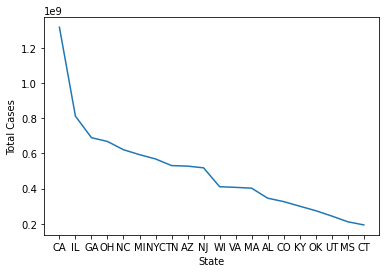

In [22]:
plt.plot(cases.state, cases.tot_cases)
plt.xlabel('State')
plt.ylabel('Total Cases')

Text(0, 0.5, 'Total Cases')

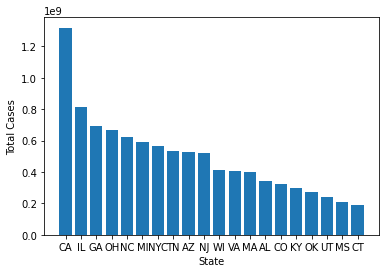

In [23]:
plt.bar(cases.state,cases.tot_cases)
plt.xlabel('State')
plt.ylabel('Total Cases')

In [24]:
#While I was working on ranking the top 20 states that has most cases. 
#I found out that I have to sum up each state's total case,otherwise the list will below to CA
#As I have sum up the cases from each state, we can find out colusion we need, and I think it is easier to read through bar graph 

In [25]:
# 3. Trend Analysis
#Top 3 states
cases1 = sum_case.nlargest(3,'tot_cases')
cases1

,state,tot_cases
2,CA,1318659173
9,IL,812217009
7,GA,689783472


<AxesSubplot:>

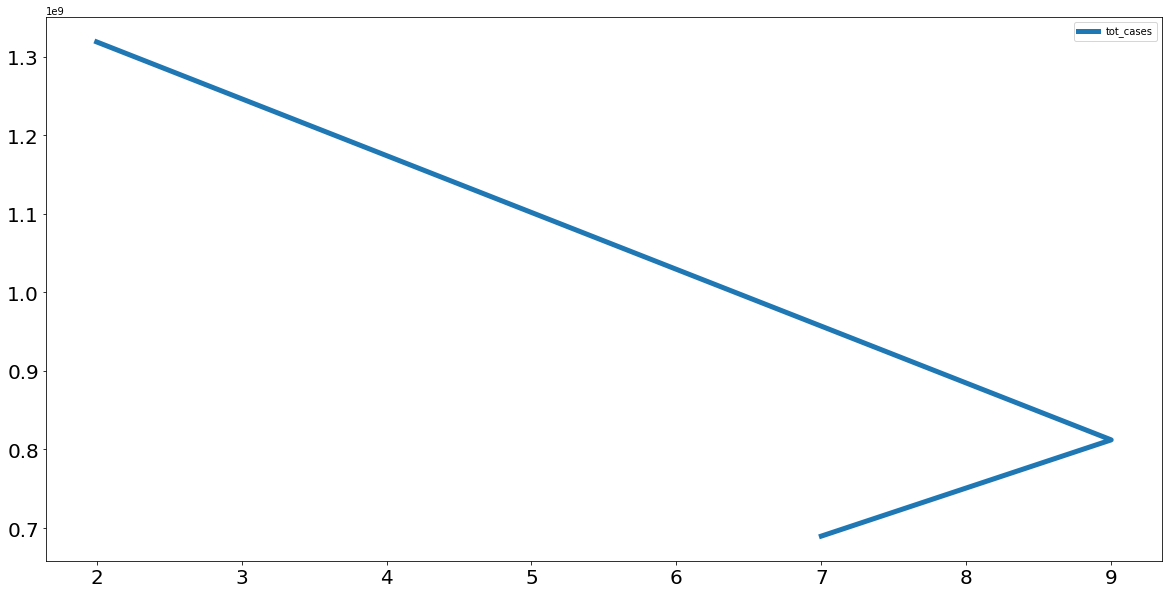

In [26]:
#Top 3 states of tot_cases
cases1.plot(figsize=(20,10), linewidth=5, fontsize=20)

In [43]:
#Top 3 states of new_case
sum_case1 = Covid2.groupby(['state'])['new_case'].sum().reset_index()

cases2 = sum_case1.nlargest(3,'new_case')
cases2

,state,new_case
2,CA,4708036
9,IL,3016558
21,OH,2652401


<AxesSubplot:>

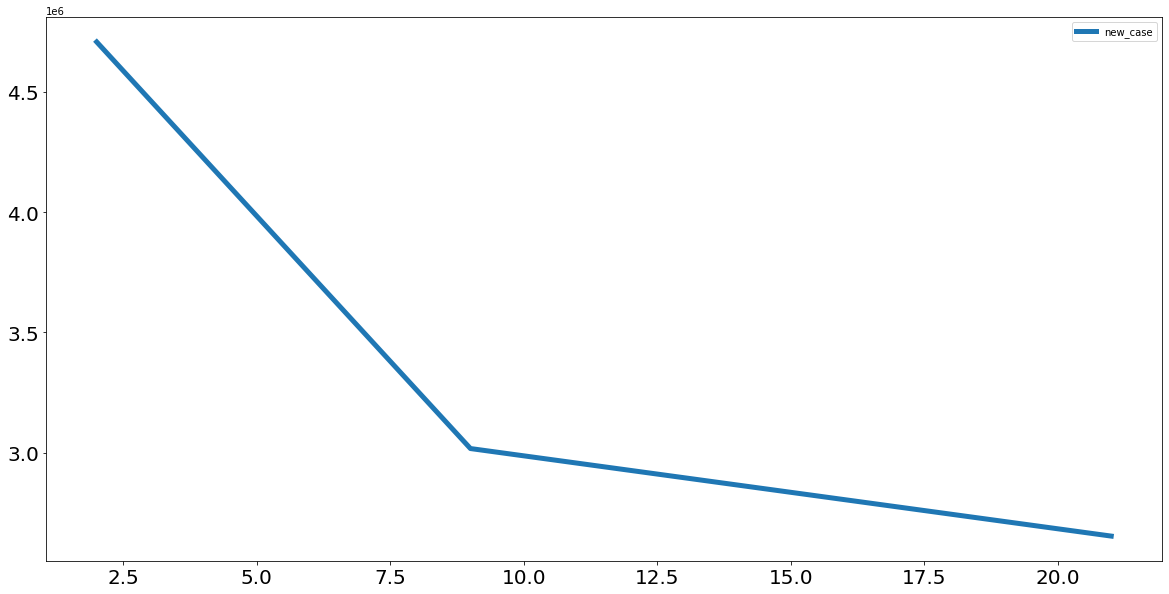

In [44]:
cases2.plot(figsize=(20,10), linewidth=5, fontsize=20)

In [45]:
#Top 3 states of tot_death
sum_case2 = Covid2.groupby(['state'])['tot_death'].sum().reset_index()

cases3 = sum_case2.nlargest(3,'tot_death')
cases3

,state,tot_death
20,NYC,20618827
2,CA,20529490
9,IL,14007941


<AxesSubplot:>

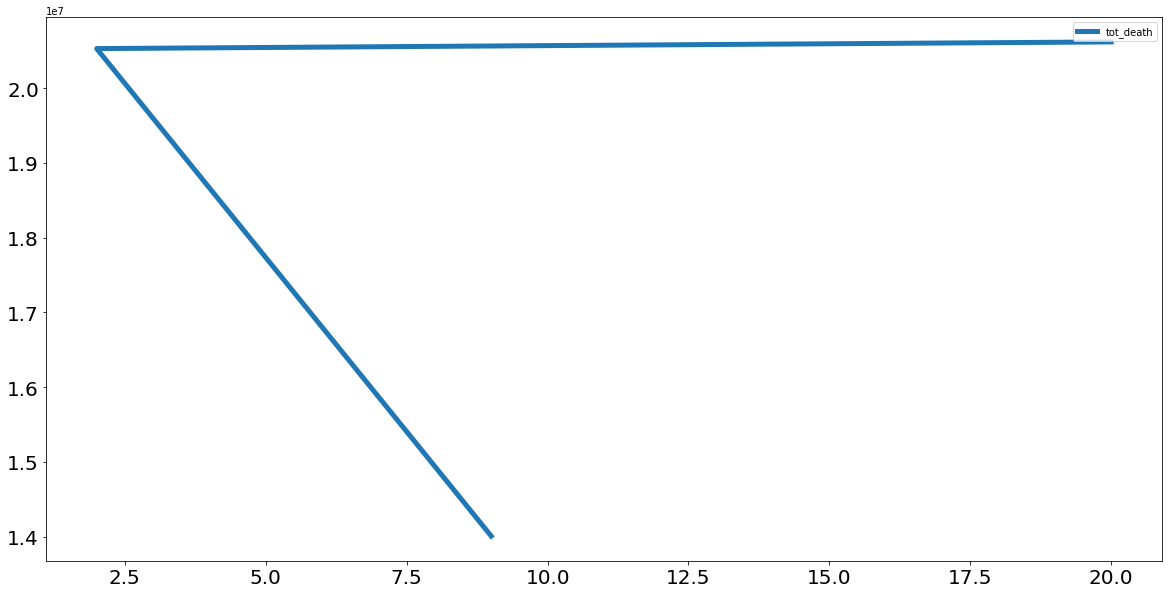

In [46]:
cases3.plot(figsize=(20,10), linewidth=5, fontsize=20)

In [37]:
#Based on the previous question, I have further made the rank into top 3, and present 3 of the variabels, which are tot_cases, new_case and tot_death
#The graphs show the amount of number cases or death of each of state
#x-axis is the row number of the state, y-axis is the sum up value of each state in million

Text(0.5, 1.0, '3-Year Weekly Rolling Average of Total Cases')

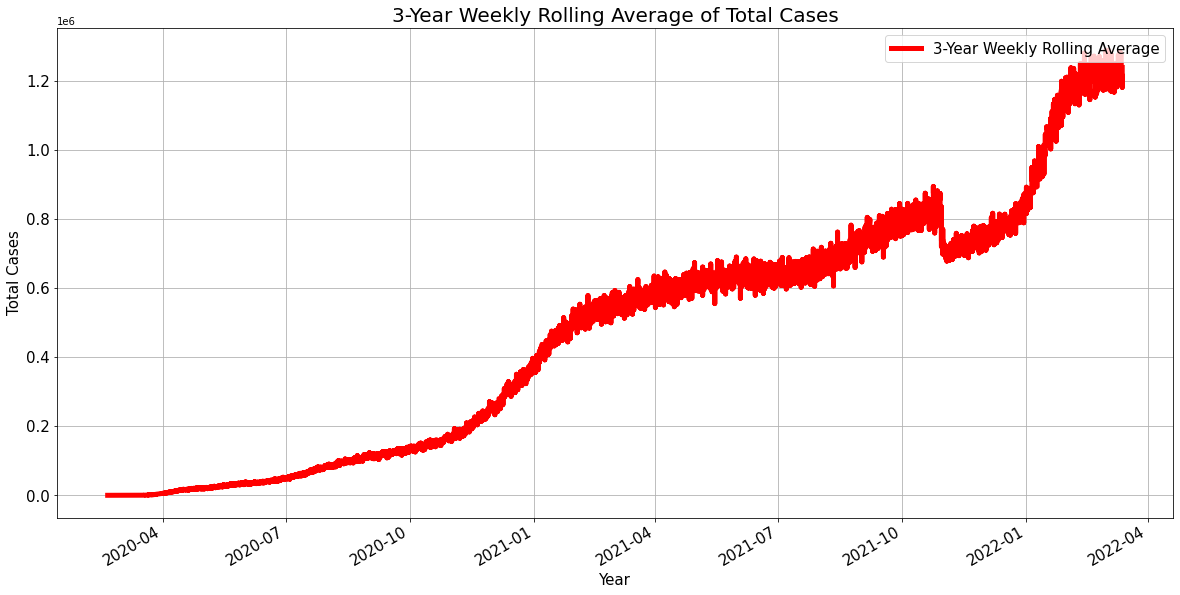

In [36]:
# 4. Weekly Rolling Average: rolling(n)=108, which is 27 month * 4 weeks/month
Tot_cases = Covid2['tot_cases']
Tot_cases.rolling(108).mean().plot(figsize=(20,10), linewidth=5, fontsize=15,label='3-Year Weekly Rolling Average',color='red')
plt.legend(loc=1,fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.grid()
plt.ylabel('Total Cases', fontsize=15)
plt.title('3-Year Weekly Rolling Average of Total Cases', fontsize=20)

In [ ]:
# 5. Conclusion
#The above graph shows the weekly moving average of Total Cases from 2020 to 2022 March
#The trend is upward which shows the situations of the pandemic and the affecting cases from beginning to nowadays